<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 12 columns):
월          12 non-null int64
강수일수       12 non-null float64
평균기온(℃)    12 non-null float64
최저기온(℃)    12 non-null float64
최고기온(℃)    12 non-null float64
강수량(mm)    12 non-null float64
황사일수       12 non-null float64
폭염일수       12 non-null float64
체감온도       12 non-null float64
미세먼지       12 non-null int64
소비자물가지수    12 non-null float64
경복궁        12 non-null int64
dtypes: float64(9), int64(3)
memory usage: 1.2 KB
None
-77.08418170461667
기울기 a :  [-5.82424307e+03 -1.92122224e+04  1.60163213e+04  1.39981195e+04
 -1.91607410e+02 -5.81437152e+03 -1.09139364e-11  6.17609005e+02
 -2.18899360e+03  1.67762861e+04]
절편 b :  -1315714.195900618


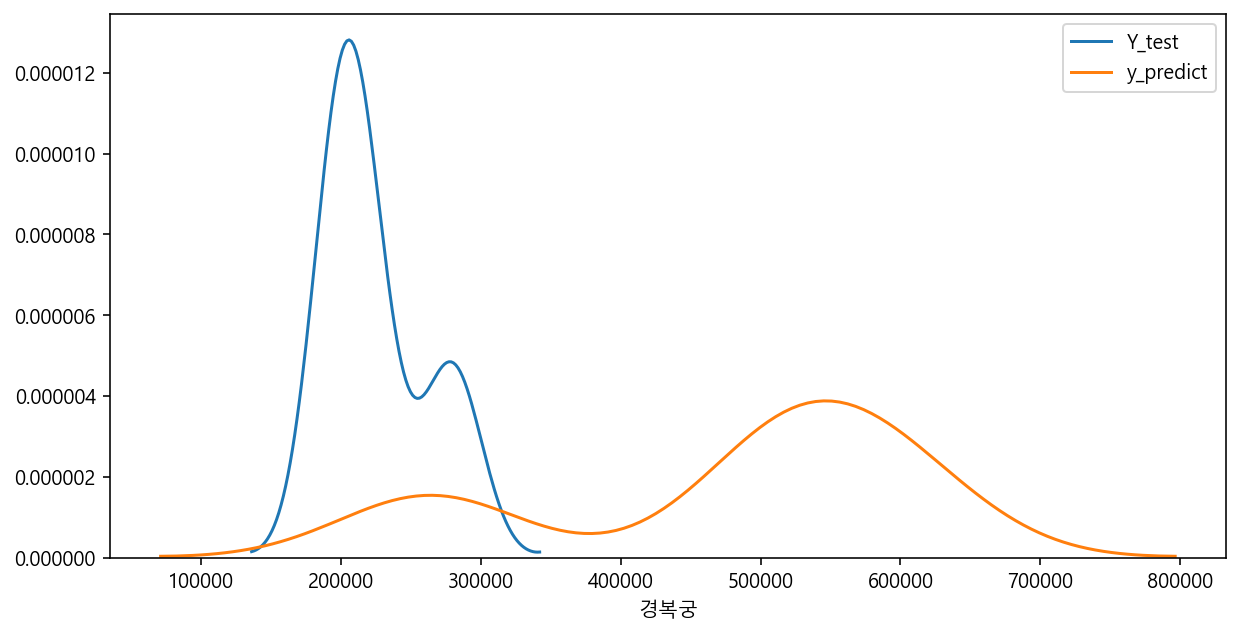

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import matplotlib
from IPython.display import set_matplotlib_formats
matplotlib.rc('font',family = 'Malgun Gothic')
set_matplotlib_formats('retina')

#1단계: 데이터 준비
df = pd.read_excel("c:./data/월별요인들.xlsx")
print(df.info()) 

# 4단계 : 훈련 데이터와 테스트 데이터로 분리
X=df[['강수일수','평균기온(℃)','최저기온(℃)','최고기온(℃)','강수량(mm)','황사일수','폭염일수','체감온도','미세먼지','소비자물가지수']]   #독립변수 X : 무게
Y=df['경복궁']    #종속변수 Y : 연비


# train data 와 test data를 7:3 비율로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)  #랜덤 추출값 10

#5단계 : 다중 회귀분석  
from sklearn.linear_model import LinearRegression  #선형회귀 라이브러리의 선형회귀분석 모듈 

lr = LinearRegression()  #단순 선형회귀분석 객체 생성

lr.fit(X_train, Y_train)  #학습 => 모델 생성

r_square = lr.score(X_test, Y_test) # 결정 계수 계산
print(r_square )    #결정 계수 :  

print('기울기 a : ', lr.coef_)
print('절편 b : ', lr.intercept_)

#기울기 a :  
# 절편 b :   

y_predict =lr.predict(X_test)   #독립변수에 대한 예측된 종속변수값 

plt.figure(figsize=(10, 5))
ax1 = sns.distplot(Y_test, hist=False, label='Y_test')
ax2 = sns.distplot(y_predict, hist=False, label='y_predict', ax=ax1)
plt.show()
plt.close()

In [24]:
X= df[['강수일수','평균기온(℃)','강수량(mm)','황사일수','폭염일수','체감온도','미세먼지','소비자물가지수']]   #독립변수 X : 무게

from sklearn import preprocessing 
X = preprocessing.StandardScaler().fit(X).transform(X)

#PCA 모델링
from sklearn.decomposition import PCA
pca_x=PCA()

#data transform
x_pca_x=pca_x.fit_transform(X)

#PCA 모델 산출값
pca_x.components_

array([[ 0.37756487,  0.42231096,  0.36331583, -0.11724724,  0.33603262,
         0.41856098, -0.37138397,  0.32759067],
       [-0.12235722,  0.13588717,  0.31180658,  0.80972515, -0.19997337,
         0.09687892,  0.2724878 ,  0.30010122],
       [-0.48699319,  0.05936219, -0.12550659, -0.2183061 , -0.5051497 ,
         0.06182368, -0.41513399,  0.51436338],
       [ 0.06415252,  0.27179482,  0.41504306, -0.23058406, -0.61359268,
         0.23462005,  0.1209418 , -0.50041265],
       [-0.25045194, -0.19494986,  0.67454396, -0.3629311 ,  0.18954628,
        -0.36510159,  0.28148103,  0.25314286],
       [ 0.71010451, -0.23605944,  0.04646462,  0.02295326, -0.41160068,
        -0.42607469, -0.1271945 ,  0.2649689 ],
       [ 0.17794257,  0.15129259, -0.32547429, -0.31226802, -0.08958026,
         0.27797779,  0.70997806,  0.39068791],
       [ 0.05057102, -0.78049528,  0.14022694,  0.00381422, -0.04531006,
         0.6036903 , -0.03717977,  0.0267251 ]])

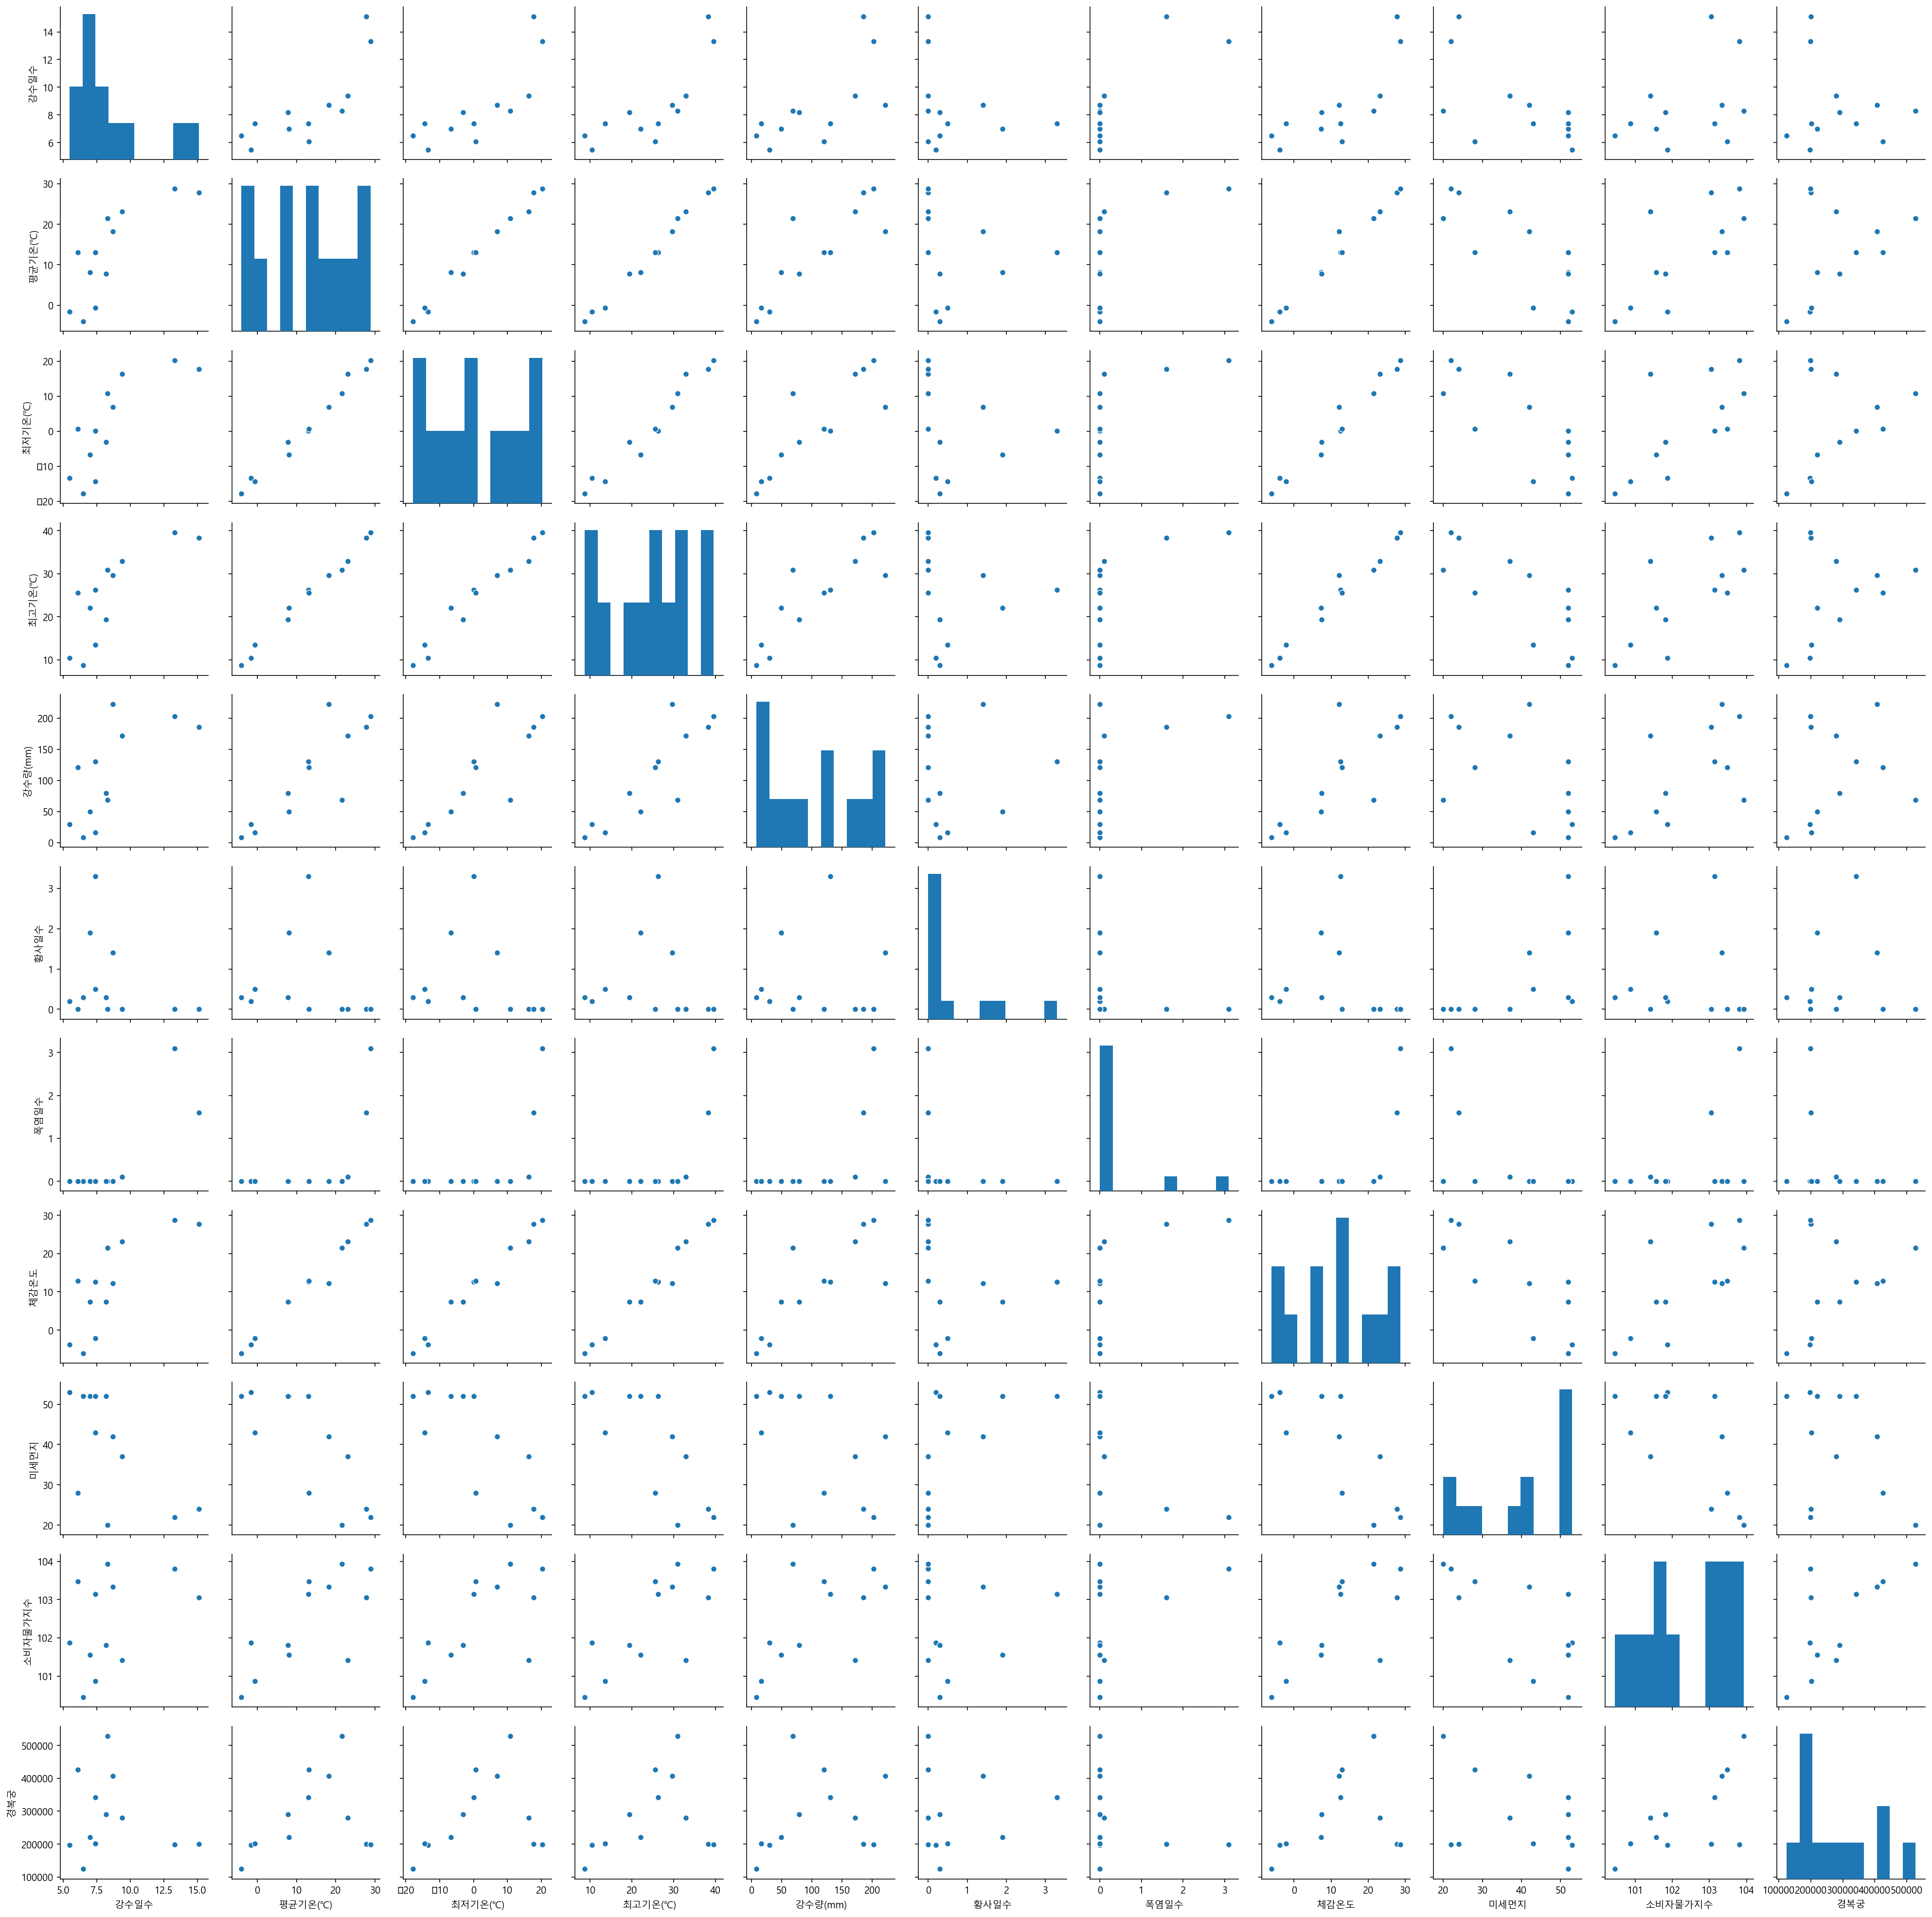

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns

# 파이썬 데이터프레임에는 .plot() 메소드가 있습니다. matplotlib을 이용하는데, matplotlib이 한글을 기본으로 인식하지 못하기 때문에 폰트를 수정해주어야 합니다.
# plt.rcParams["font.family"] = 'Malgun Gothic'
# set_matplotlib_formats('retina')

%matplotlib inline
import matplotlib
from IPython.display import set_matplotlib_formats
matplotlib.rc('font',family = 'Malgun Gothic')
set_matplotlib_formats('retina')

ndf= df[['강수일수','평균기온(℃)','최저기온(℃)','최고기온(℃)','강수량(mm)','황사일수','폭염일수','체감온도','미세먼지','소비자물가지수','경복궁']]
sns.pairplot(ndf,palette='husl')
plt.show()

C:\Users\student\.conda\envs\tutorial\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\.conda\envs\tutorial\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


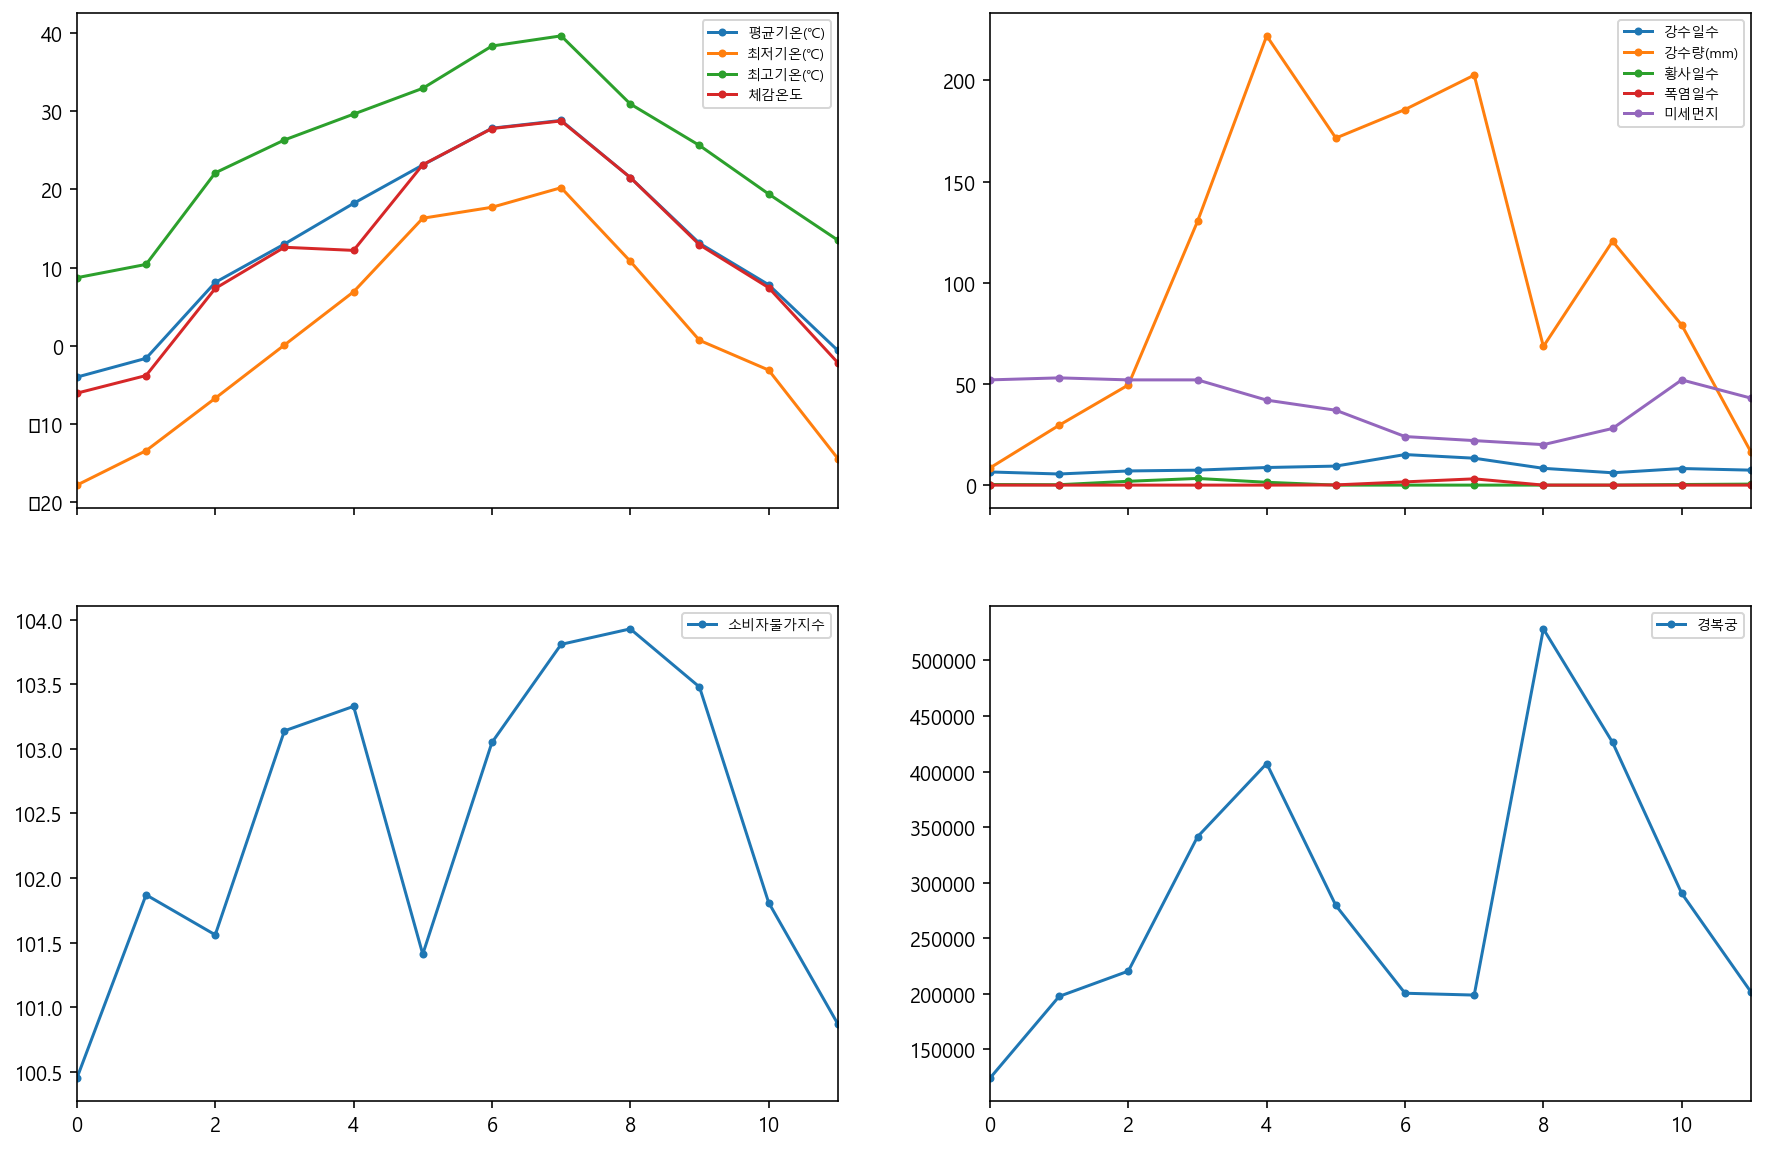

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 선명하게 보기
%matplotlib inline
import matplotlib
from IPython.display import set_matplotlib_formats
matplotlib.rc('font',family = 'Malgun Gothic')
set_matplotlib_formats('retina')

f, axes = plt.subplots(2, 2, figsize=(15,10), sharex=True)

#기상그래프
xdf = df[['평균기온(℃)','최저기온(℃)','최고기온(℃)','체감온도']]
plt.rc('font',family='Malgun Gothic',size=7)
xdf.plot(marker=".",ax=axes[0, 0])


#기상일수+먼지 그래프
ydf = df[['강수일수','강수량(mm)','황사일수','폭염일수','미세먼지']]
plt.rc('font',family='Malgun Gothic',size=7)
ydf.plot(marker=".",ax=axes[0, 1])

zdf = df[['소비자물가지수']]
plt.rc('font',family='Malgun Gothic',size=7)
zdf.plot(marker=".",ax=axes[1, 0])

z1df = df[['경복궁']]
plt.rc('font',family='Malgun Gothic',size=7)
z1df.plot(marker=".",ax=axes[1, 1])

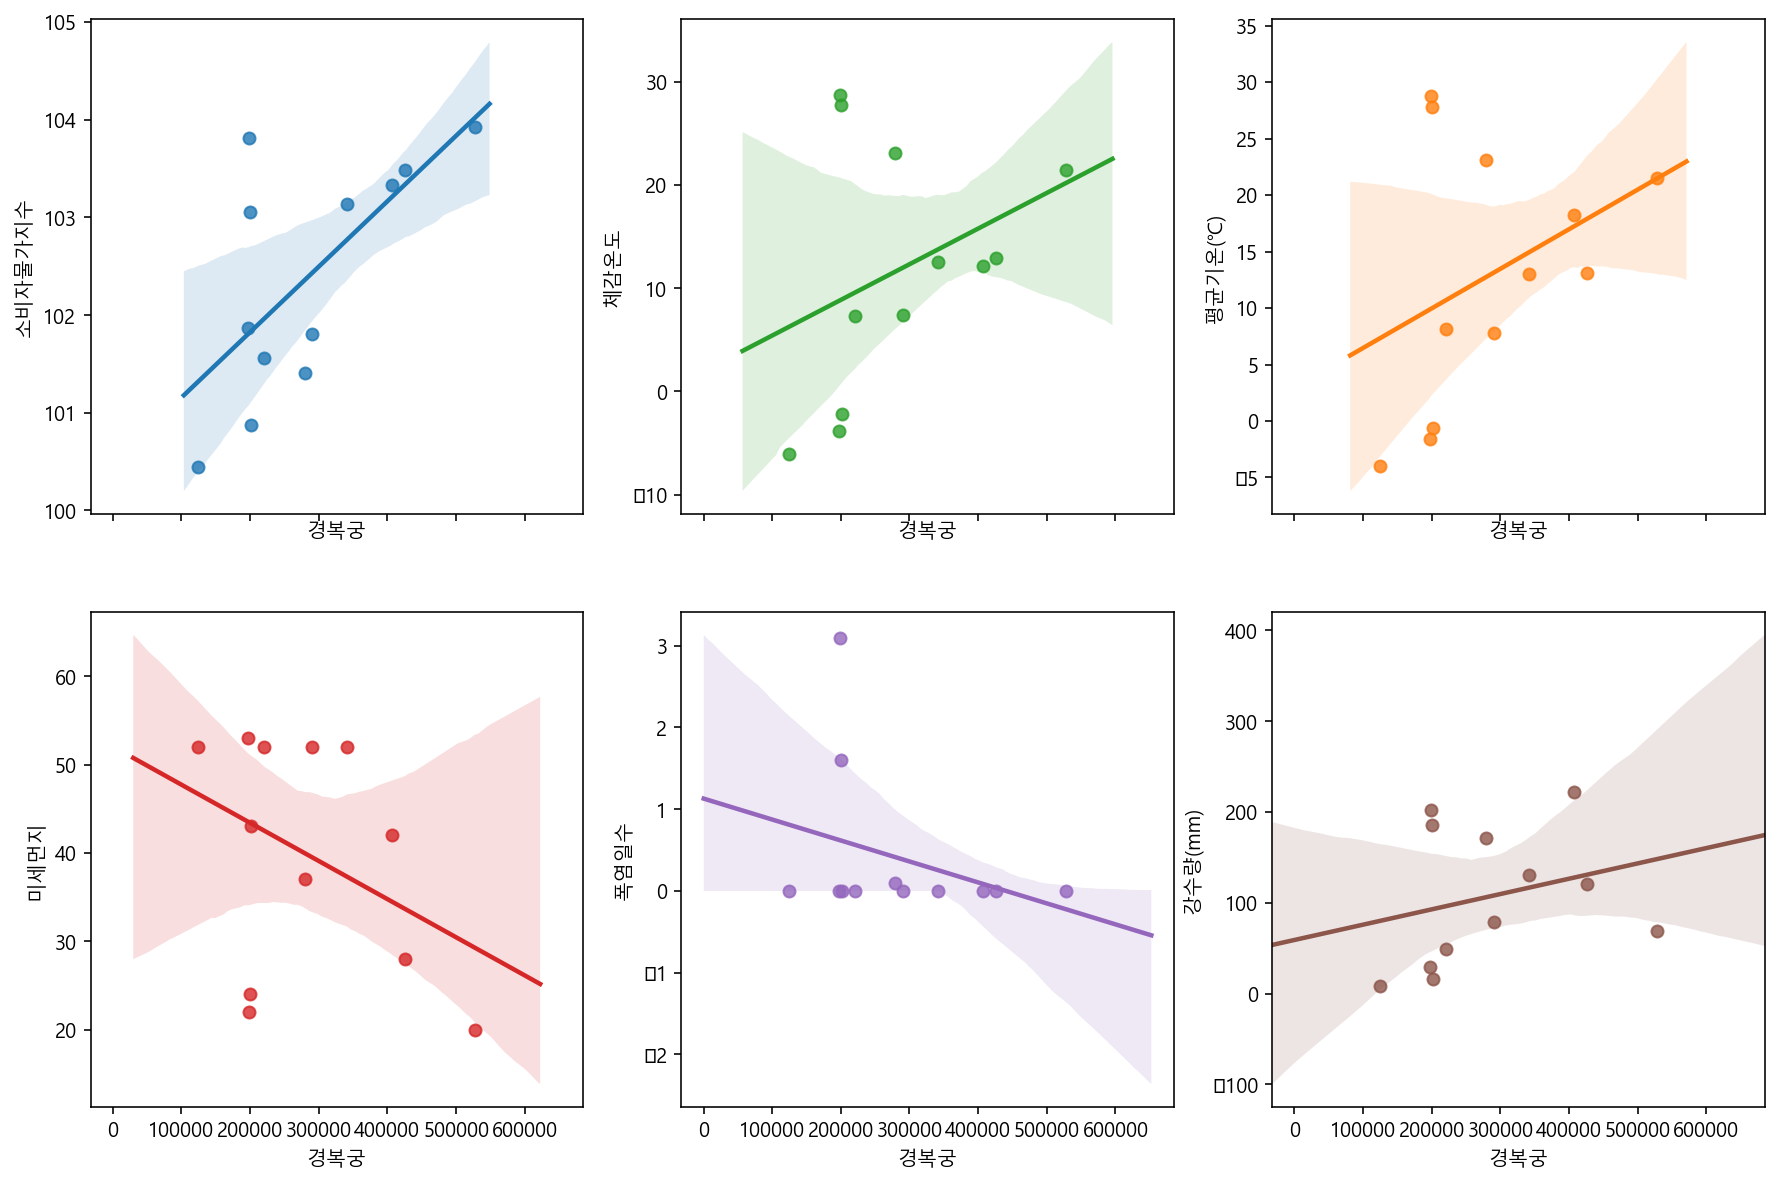

In [20]:
# 한글 선명하게 보기
%matplotlib inline
import matplotlib
from IPython.display import set_matplotlib_formats
matplotlib.rc('font',family = 'Malgun Gothic')
set_matplotlib_formats('retina')

ndf = df[['강수일수','평균기온(℃)','최저기온(℃)','최고기온(℃)','강수량(mm)','황사일수','폭염일수','체감온도','미세먼지','소비자물가지수','경복궁']]

f, axes = plt.subplots(2,3, figsize=(15,10), sharex=True)

sns.regplot('경복궁','소비자물가지수',data=ndf,ax=axes[0,0])
sns.regplot('경복궁','평균기온(℃)',data=ndf,ax=axes[0,2])
sns.regplot('경복궁','체감온도',data=ndf,ax=axes[0,1])
sns.regplot('경복궁','미세먼지',data=ndf,ax=axes[1,0])
sns.regplot('경복궁','폭염일수',data=ndf,ax=axes[1,1])
sns.regplot('경복궁','강수량(mm)',data=ndf,ax=axes[1,2])

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#1단계: 데이터 준비
df = pd.read_excel("./data/월별요인들.xlsx")
# print(df.info()) 


# #3단계 : 분석에 사용할 특성(열, 변수) 선택 
ndf = df[['강수일수','평균기온(℃)','최저기온(℃)','최고기온(℃)','강수량(mm)','황사일수','폭염일수','체감온도','미세먼지','소비자물가지수']]
ydf = df[['경복궁']]


#데이터 전처리 - 데이터 표준화 작업
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(ndf.values)
x_scaled=scaler.transform(ndf.values)

#PCA 모델링
from sklearn.decomposition import PCA
pca_x=PCA()
pca_x.fit(x_scaled)
#data transform
x_pca_x=pca_x.transform(x_scaled)

#PCA 모델 산출값
pca_x.components_

array([[ 0.31852329,  0.36899403,  0.36659983,  0.3672075 ,  0.31879344,
        -0.08484809,  0.27408849,  0.36556269, -0.31131215,  0.28043761],
       [-0.1637604 ,  0.09645237,  0.04975151,  0.14272203,  0.26897519,
         0.80441075, -0.24891024,  0.05962474,  0.30595632,  0.24997936],
       [-0.49399051,  0.0525636 ,  0.0417782 ,  0.01271594, -0.13431374,
        -0.23020944, -0.52171488,  0.05589249, -0.40603683,  0.48999028],
       [ 0.01266413,  0.18573241,  0.26830821,  0.13191798,  0.25441865,
        -0.22623849, -0.59929597,  0.17002551,  0.17168294, -0.58523446],
       [-0.19187148, -0.12418472, -0.031131  , -0.16248878,  0.75022598,
        -0.35874754,  0.1176325 , -0.30052907,  0.2600597 ,  0.23888648],
       [ 0.70415398, -0.11776552, -0.2529839 , -0.10095047,  0.16157464,
         0.07821319, -0.43978371, -0.29424314, -0.27848331,  0.16229988],
       [ 0.30286885,  0.07638866,  0.18515416, -0.11419464, -0.33712229,
        -0.26889478, -0.14721704,  0.15559198

(8, 36)
(8, 7)
-16.168639568925656
기울기 a :  [-6.91215973e-11 -5.60208753e+03  2.32954537e+04  4.64485723e+04
 -1.12959263e+04 -2.73960536e+04  1.11424779e+04  1.22844058e+04
  4.66787895e+04 -9.41591131e+03 -1.52674531e+04 -8.14184824e+02
  9.82825721e+03 -1.27440922e+04 -5.00036655e+04  6.59822072e+03
  4.30749047e+02  3.24161011e+03 -3.72457323e+03 -1.95224483e+03
  9.52361284e+03 -6.83763878e+03 -1.49805395e+02 -2.39219416e+03
 -5.84049098e+03  1.24121566e+04 -3.42283043e+03 -1.06009514e+04
 -7.58788956e+03 -1.23878300e+04  5.38185342e+04 -3.29164275e+04
 -3.53650740e+04 -3.47472633e+03 -4.35971988e+03  3.09794128e+04]
절편 b :  317046.27359804977


C:\Users\student\.conda\envs\tutorial\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\.conda\envs\tutorial\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


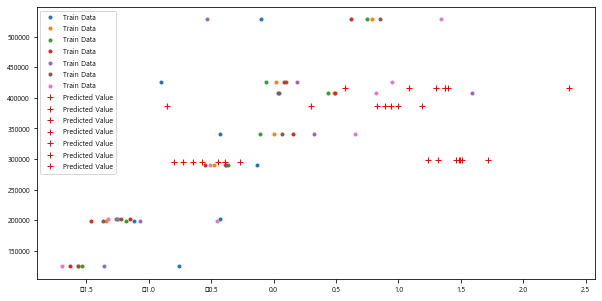

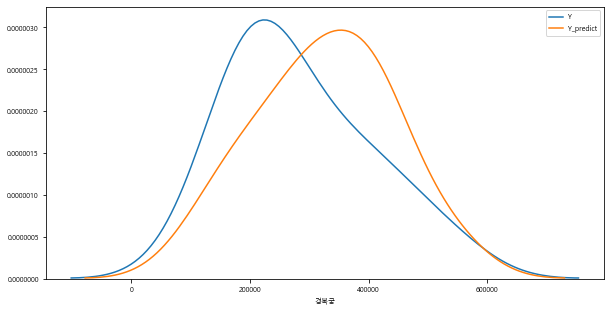

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#1단계: 데이터 준비
ddf = pd.read_excel("./data/월별요인들.xlsx")

#분석에 사용할 특성(열, 변수) 선택 (연비, 실린더, 마력, 중력)
ndf=ddf[['월','강수일수','평균기온(℃)','최저기온(℃)','최고기온(℃)','강수량(mm)','황사일수','폭염일수','체감온도','미세먼지','소비자물가지수','경복궁']]

#훈련 데이터와 테스트 데이터로 분리
X=ndf[['강수일수','평균기온(℃)','최저기온(℃)','최고기온(℃)','강수량(mm)','체감온도','소비자물가지수']]   #독립변수 X : 무게
Y=ndf['경복궁']    #종속변수 Y : 

from sklearn import preprocessing 
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data 와 test data를 7:3 비율로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)  #랜덤 추출값 10


# 5단계 : 단순회귀분석 - 학습
from sklearn.linear_model import LinearRegression  #선형회귀 라이브러리의 선형회귀분석 모듈 
from  sklearn.preprocessing import PolynomialFeatures  #다항식 변환

#다항식 변환
poly = PolynomialFeatures(degree=2)  # 2차항 적용
x_train_poly =poly.fit_transform(X_train)   # X학습데이터를 2차항으로 변형
print(x_train_poly.shape)
print(X_train.shape)

lr = LinearRegression()  #단순 선형회귀분석 객체 생성

lr.fit(x_train_poly, Y_train)  #학습


x_test_poly =poly.fit_transform(X_test) 
r_square = lr.score(x_test_poly, Y_test) # 결정 계수 계산
print(r_square )    #결정 계수 :    0.7087009262975685


print('기울기 a : ', lr.coef_)
print('절편 b : ', lr.intercept_)

#기울기 a :     [ 0.00000000e+00 -1.85768289e-02  1.70491223e-06]
# 절편 b :  62.58071221573144

y_test_predict = lr.predict(x_test_poly)  #test 데이터에 대한 모델의 예측값 구하기

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1,1, 1)
ax.plot(X_train, Y_train, '.', label='Train Data')
ax.plot(X_test, y_test_predict, 'r+', label='Predicted Value')  #학습한 회귀선
ax.legend(loc='best')
plt.show()
plt.close()

X_poly = poly.fit_transform(X)
y_predict = lr.predict(X_poly)   #전체 데이터 X에 대한 모델의 예측값 반환
fig = plt.figure(figsize=(10, 5))
ax1 = sns.distplot(Y, hist=False, label="Y")
ax2 = sns.distplot(y_predict, hist=False, label="Y_predict", ax=ax1)
plt.show()
plt.close()

(8, 36)
(8, 7)
-16.168639568925656
기울기 a :  [-6.91215973e-11 -5.60208753e+03  2.32954537e+04  4.64485723e+04
 -1.12959263e+04 -2.73960536e+04  1.11424779e+04  1.22844058e+04
  4.66787895e+04 -9.41591131e+03 -1.52674531e+04 -8.14184824e+02
  9.82825721e+03 -1.27440922e+04 -5.00036655e+04  6.59822072e+03
  4.30749047e+02  3.24161011e+03 -3.72457323e+03 -1.95224483e+03
  9.52361284e+03 -6.83763878e+03 -1.49805395e+02 -2.39219416e+03
 -5.84049098e+03  1.24121566e+04 -3.42283043e+03 -1.06009514e+04
 -7.58788956e+03 -1.23878300e+04  5.38185342e+04 -3.29164275e+04
 -3.53650740e+04 -3.47472633e+03 -4.35971988e+03  3.09794128e+04]
절편 b :  317046.27359804977


C:\Users\student\.conda\envs\tutorial\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\.conda\envs\tutorial\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


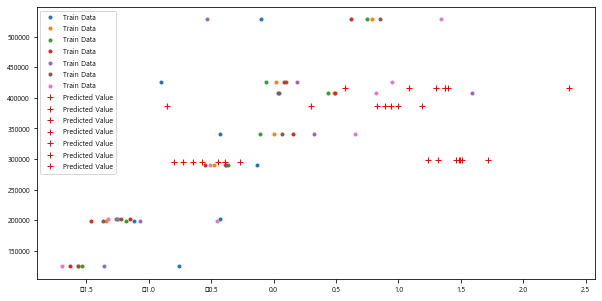

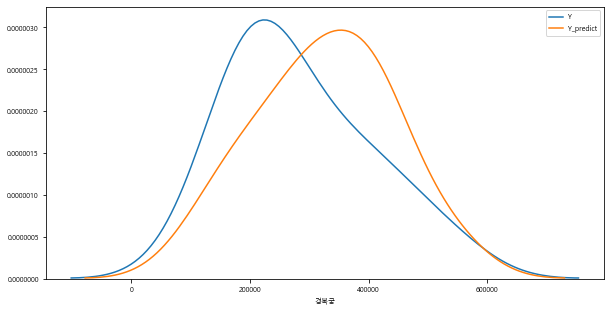

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#1단계: 데이터 준비
ddf = pd.read_excel("./data/월별요인들.xlsx")

#분석에 사용할 특성(열, 변수) 선택 (연비, 실린더, 마력, 중력)
ndf=ddf[['월','강수일수','평균기온(℃)','최저기온(℃)','최고기온(℃)','강수량(mm)','황사일수','폭염일수','체감온도','미세먼지','소비자물가지수','경복궁']]

#훈련 데이터와 테스트 데이터로 분리
X=ndf[['강수일수','평균기온(℃)','최저기온(℃)','최고기온(℃)','강수량(mm)','체감온도','소비자물가지수']]   #독립변수 X : 무게
Y=ndf['경복궁']    #종속변수 Y : 

from sklearn import preprocessing 
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data 와 test data를 7:3 비율로 분리
from sklearn.model_selection import train_test_split
X_train, X_tset, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)  #랜덤 추출값 10


# 5단계 : 단순회귀분석 - 학습
from sklearn.linear_model import LinearRegression  #선형회귀 라이브러리의 선형회귀분석 모듈 
from  sklearn.preprocessing import PolynomialFeatures  #다항식 변환

#다항식 변환
poly = PolynomialFeatures(degree=2)  # 2차항 적용
x_train_poly =poly.fit_transform(X_train)   # X학습데이터를 2차항으로 변형
print(x_train_poly.shape)
print(X_train.shape)

lr = LinearRegression()  #단순 선형회귀분석 객체 생성

lr.fit(x_train_poly, Y_train)  #학습


x_test_poly =poly.fit_transform(X_test) 
r_square = lr.score(x_test_poly, Y_test) # 결정 계수 계산
print(r_square )    #결정 계수 :    0.7087009262975685


print('기울기 a : ', lr.coef_)
print('절편 b : ', lr.intercept_)

#기울기 a :     [ 0.00000000e+00 -1.85768289e-02  1.70491223e-06]
# 절편 b :  62.58071221573144

y_test_predict = lr.predict(x_test_poly)  #test 데이터에 대한 모델의 예측값 구하기

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1,1, 1)
ax.plot(X_train, Y_train, '.', label='Train Data')
ax.plot(X_test, y_test_predict, 'r+', label='Predicted Value')  #학습한 회귀선
ax.legend(loc='best')
plt.show()
plt.close()

X_poly = poly.fit_transform(X)
y_predict = lr.predict(X_poly)   #전체 데이터 X에 대한 모델의 예측값 반환
fig = plt.figure(figsize=(10, 5))
ax1 = sns.distplot(Y, hist=False, label="Y")
ax2 = sns.distplot(y_predict, hist=False, label="Y_predict", ax=ax1)
plt.show()
plt.close()